<a href="https://colab.research.google.com/github/aureeliano/Mamdani/blob/main/Mamdani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=4feff92957502dc00ecc69fd64f69216d9f6b251da3da96663d02a25e71d8b45
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
#Ingresar la nota obtenida en el examen y en el concepto

notaDeExamen = 45
notaDeConcepto = 3

In [ ]:
# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
examen = np.arange(0, 101, 1)
concepto = np.arange(0, 10.1, 0.1)
notaFinal  = np.arange(0, 10.1, 0.1)


In [ ]:
# Generate fuzzy membership functions
examenMal = fuzz.trimf(examen, [0, 0, 50])
examenBien = fuzz.trimf(examen, [40, 50, 60])
examenExcelente = fuzz.trimf(examen, [50, 100, 100])

conceptoMalo = fuzz.trimf(concepto, [0, 0, 5])
conceptoBueno = fuzz.trimf(concepto, [4, 5, 6])
conceptoExcelente = fuzz.trimf(concepto, [5, 10, 10])

notaFinalDesaprueba = fuzz.trimf(notaFinal, [0, 0, 5])
notaFinalHabilita = fuzz.trimf(notaFinal, [4, 5, 6])
notaFinalPromociona = fuzz.trimf(notaFinal, [5, 10, 10])

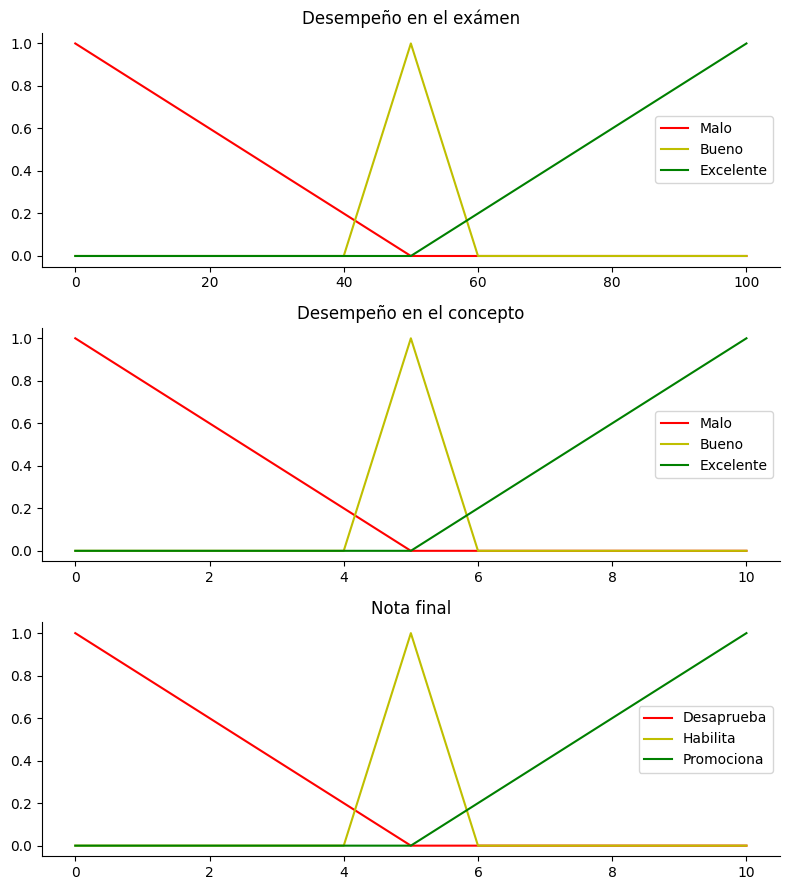

In [ ]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(examen, examenMal, 'r', linewidth=1.5, label='Malo')
ax0.plot(examen, examenBien, 'y', linewidth=1.5, label='Bueno')
ax0.plot(examen, examenExcelente, 'g', linewidth=1.5, label='Excelente')
ax0.set_title('Desempeño en el exámen')
ax0.legend()

ax1.plot(concepto, conceptoMalo, 'r', linewidth=1.5, label='Malo')
ax1.plot(concepto, conceptoBueno, 'y', linewidth=1.5, label='Bueno')
ax1.plot(concepto, conceptoExcelente, 'g', linewidth=1.5, label='Excelente')
ax1.set_title('Desempeño en el concepto')
ax1.legend()

ax2.plot(notaFinal, notaFinalDesaprueba, 'r', linewidth=1.5, label='Desaprueba')
ax2.plot(notaFinal, notaFinalHabilita, 'y', linewidth=1.5, label='Habilita')
ax2.plot(notaFinal, notaFinalPromociona, 'g', linewidth=1.5, label='Promociona')
ax2.set_title('Nota final')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

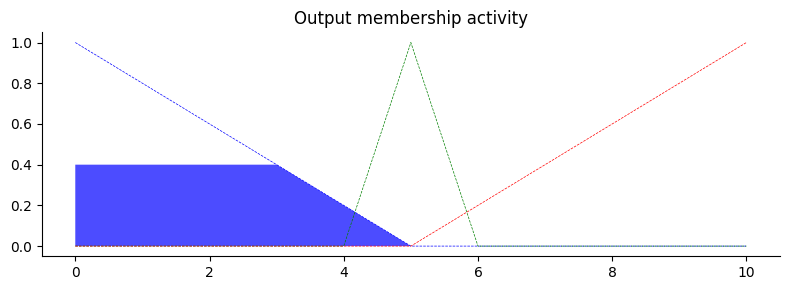

In [ ]:

#acá calculamos qué grado de pertenencia tiene la nota del examen en los conjntos examenMal, examenBien y examenExcelente
NivelDePertenencia_ExamenMal = fuzz.interp_membership(examen, examenMal, notaDeExamen)
NivelDePertenencia_ExamenBien = fuzz.interp_membership(examen, examenBien, notaDeExamen)
NivelDePertenencia_ExamenExcelente = fuzz.interp_membership(examen, examenExcelente, notaDeExamen)




#acá calculamos qué grado de pertenencia tiene la nota de concepto en los conjntos conceptoMalo, conceptoBueno y conceptoExcelente
NivelDePertenencia_ConceptoMalo = fuzz.interp_membership(concepto, conceptoMalo, notaDeConcepto)
NivelDePertenencia_ConceptoBueno = fuzz.interp_membership(concepto, conceptoBueno, notaDeConcepto)
NivelDePertenencia_ConceptoExcelente = fuzz.interp_membership(concepto, conceptoExcelente, notaDeConcepto)


#REGLAS

#peso del examen por sobre el concepto

pesoExamen = 3

#desaprueba:
#examen mal
#examen bien and concepto malo
active_rule1 = np.fmin(NivelDePertenencia_ExamenBien * pesoExamen, NivelDePertenencia_ConceptoMalo)
notaFinalDesaprueba_activation = np.fmin(np.fmax(NivelDePertenencia_ExamenMal * pesoExamen, active_rule1), notaFinalDesaprueba)


#habilita
#examen bien and concepto bueno
#examen excelente and concepto malo

active_rule2a = np.fmin(NivelDePertenencia_ExamenBien * pesoExamen, NivelDePertenencia_ConceptoBueno)
active_rule2b = np.fmin(NivelDePertenencia_ExamenExcelente * pesoExamen, NivelDePertenencia_ConceptoMalo)
notaFinalHabilita_activation = np.fmin(np.fmax(active_rule2a, active_rule2b), notaFinalHabilita)

#promociona
#examen bien and concepto excelente
#examen excelente and concepto excelente

active_rule3a = np.fmin(NivelDePertenencia_ExamenBien, NivelDePertenencia_ConceptoExcelente)
active_rule3b = np.fmin(NivelDePertenencia_ExamenExcelente, NivelDePertenencia_ConceptoExcelente)
notaFinalPromociona_activation = np.fmin(np.fmax(active_rule3a, active_rule3b), notaFinalPromociona)


notaFinal0 = np.zeros_like(notaFinal)
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(notaFinal, notaFinal0, notaFinalDesaprueba_activation, facecolor='b', alpha=0.7)
ax0.plot(notaFinal, notaFinalDesaprueba, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(notaFinal, notaFinal0, notaFinalHabilita_activation, facecolor='g', alpha=0.7)
ax0.plot(notaFinal, notaFinalHabilita, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(notaFinal, notaFinal0, notaFinalPromociona_activation, facecolor='r', alpha=0.7)
ax0.plot(notaFinal, notaFinalPromociona, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

Nota final:  2.041666666666668


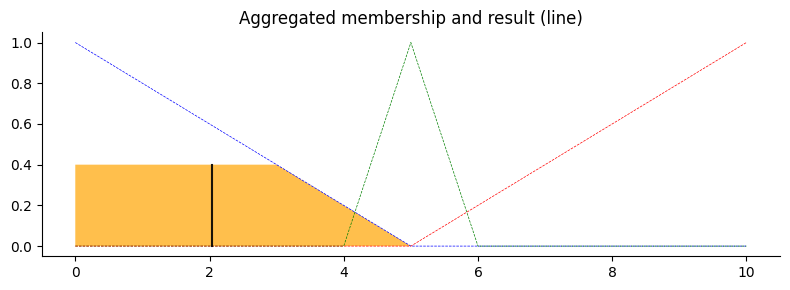

In [ ]:
# Aggregate all three output membership functions together
aggregated = np.fmax(notaFinalDesaprueba_activation,
                     np.fmax(notaFinalHabilita_activation, notaFinalPromociona_activation))

# Calculate defuzzified result
notaFinal_centroide = fuzz.defuzz(notaFinal, aggregated, 'centroid')
notaFinal_activation = fuzz.interp_membership(notaFinal, aggregated, notaFinal_centroide)  # for plot

print("Nota final: ",notaFinal_centroide)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(notaFinal, notaFinalDesaprueba, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(notaFinal, notaFinalHabilita, 'g', linewidth=0.5, linestyle='--')
ax0.plot(notaFinal, notaFinalPromociona, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(notaFinal, notaFinal0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([notaFinal_centroide, notaFinal_centroide], [0, notaFinal_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

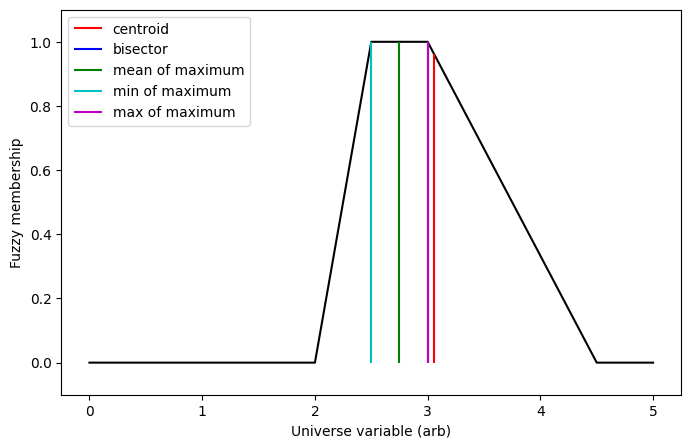

In [ ]:
# Generate trapezoidal membership function on range [0, 1]
x = np.arange(0, 5.05, 0.1)
mfx = fuzz.trapmf(x, [2, 2.5, 3, 4.5])

# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')  # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))

plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()